In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Solution to Exercise 4.5

In [2]:
# Define the data

def u_l(t):
    # Left boundary
    # Define some function of t, e.g., sin(pi*t)
    z = np.sin(np.pi*t)
    return z

def u_r(t):
    # Right boundary
    # Define some function of t, e.g. cos(pi*t)
    z = np.cos(np.pi*t)
    return z

def f(x):
    # Initial data chosen so that 
    # u_l(0)=f(0) and u_r(0) = f(1), e.g., x
    z = x
    return z

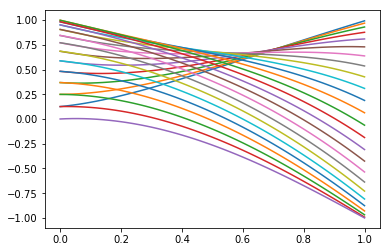

In [3]:
# Define an explicit method

n = 49
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= 1/dx**2

r = 0.5
dt = r*dx**2

v = np.copy(f(x))

t = 0

bdry_force = np.zeros(n)

B = np.eye(n)-dt*A
count = 0

while t<1:
    bdry_force[0] = dt*u_l(t)/dx**2
    bdry_force[-1] = dt*u_r(t)/dx**2
    v[1:-1] = np.dot(B,v[1:-1]) + bdry_force 
    t += dt
    v[0] = u_l(t)
    v[-1] = u_r(t)
    count += 1
    if count%200 == 0:
        plt.plot(x,v)

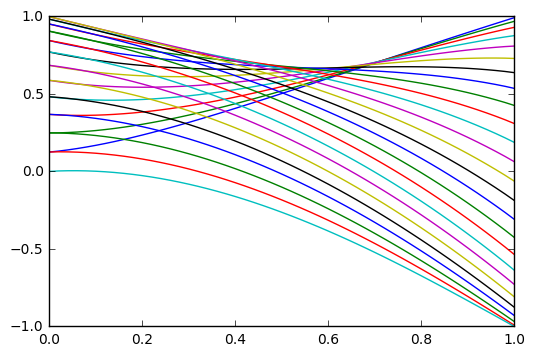

In [8]:
# Define an implicit method

n = 49
x = np.linspace(0,1,n+2)
dx = x[1]-x[0]

A = np.zeros((n,n))
np.fill_diagonal(A,2)
A += np.diag(-np.ones(n-1),k=1)
A += np.diag(-np.ones(n-1),k=-1)    
A *= 1/dx**2

r = 0.5
dt = r*dx**2

v = np.copy(f(x))

t = 0

bdry_force = np.zeros(n)

B = np.eye(n)+dt*A
B_inv = np.linalg.inv( B )

count = 0

while t<1:
    bdry_force[0] = dt*u_l(t)/dx**2
    bdry_force[-1] = dt*u_r(t)/dx**2
    v[1:-1] = np.dot( B_inv, v[1:-1] + bdry_force )
    t += dt
    v[0] = u_l(t)
    v[-1] = u_r(t)
    count += 1
    if count%200 == 0:
        plt.plot(x,v)